# HLT Assignment

In addition to practising the process of loading data, regularizing it and using it to train a model, the goal of this assignment is to investigat the effect of changing model parameters on the performance.

## Step 1: loading the data

We'll be going a bit further with the robot collision dataset. This time, instead of looking at just the first file, we'll look at all five different tasks combined (lp1.data to lp5.data). Prepare two different arrays, X1 and X2, as follows:
- Each element in X1 is the immediate reading of the force and torque values after an event, [f1, f2, f3, t1, t2, t3]. The first element should be [1, 1, 63, 3, 1, 0]
- Each element in X2 contains 18 values in total - the first, fifth and tenth sets of sensor readings after an event. The first element should be [-1, -1, 61, -3, 0, 0, -1, -1, 63, -3, -1, 0, -1, -1, 61, -3, 0, 0]

y should contain the corresponding classes, represented as integers according the the provided dictionary

In [115]:
files = ['robot_execution_failure/lp1.data', 'robot_execution_failure/lp2.data',
'robot_execution_failure/lp3.data', 'robot_execution_failure/lp4.data', 'robot_execution_failure/lp5.data']
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3}

In [116]:
# Your answer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc


In [117]:
lines = []
for i in range(len(files)):
    f1 = open(files[i])
    file_lines = f1.readlines()
    for j in file_lines: 
        lines.append(j)

In [118]:
new_lines = [x.strip() for x in lines]

In [119]:
new_lines= [i.strip('') for i in new_lines]

In [120]:
newer = []
for i in new_lines:
    if len(i)>0:
        newer.append(i)
newer[:20]

['normal',
 '-1\t-1\t63\t-3\t-1\t0',
 '0\t0\t62\t-3\t-1\t0',
 '-1\t-1\t61\t-3\t0\t0',
 '-1\t-1\t63\t-2\t-1\t0',
 '-1\t-1\t63\t-3\t-1\t0',
 '-1\t-1\t63\t-3\t-1\t0',
 '-1\t-1\t63\t-3\t0\t0',
 '-1\t-1\t63\t-3\t-1\t0',
 '-1\t-1\t63\t-3\t-1\t0',
 '-1\t-1\t61\t-3\t0\t0',
 '-1\t-1\t61\t-3\t0\t0',
 '-1\t-1\t64\t-3\t-1\t0',
 '-1\t-1\t64\t-3\t-1\t0',
 '-1\t-1\t60\t-3\t0\t0',
 '-1\t0\t64\t-2\t-1\t0',
 'normal',
 '-1\t-1\t63\t-2\t-1\t0',
 '-1\t-1\t63\t-3\t-1\t0',
 '-1\t-1\t61\t-3\t0\t0']

In [121]:
classes = {'normal':0, 'collision':1, 'obstruction':2, 'fr_collision':3}

In [122]:
X1 = []
y = []
for i in range(len(newer) - 1):
    line = newer[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        for k in range(1,16):
            features = [int(x) for x in newer[i+k].strip().split('\t')] # Split the next line to get our features
            X1.append(features)
            y.append(classes[line]) # And record which class this set of features belongs to


In [123]:
np.shape(y), np.shape(X1)

((4035,), (4035, 6))

## Step 2: establishing a baseline

Using techniques covered in this unit, split X1 and y into separate training and testing sets. Use the training set to train a neural network (MLPClassifier) using default parameters but with hidden_layer_sizes=(20, 20, 20). Use the test data you held back to score the model you have created. How well does it perform? Print out the score and confusion matrix. For more accuracy, run through these steps 10 times and find the average score - bonus points for running more times and getting a standard deviation!

In [116]:
# Your answer


In [124]:
import sklearn.model_selection as ms
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

In [133]:
Xtrain,Xtest,ytrain,ytest =ms.train_test_split(X1,y)

In [126]:
scores = []
confusion_matrices = []
def neural_model(Xtrain,Xtest,ytrain,ytest):
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest  =scaler.transform(Xtest)
    mlp = MLPClassifier(hidden_layer_sizes=(20,20,20))
    mlp.fit(Xtrain,ytrain);
    ypred = mlp.predict(Xtest)
    confusion_matrices.append(confusion_matrix(ytest,ypred))
    scores.append(mlp.score(Xtest, ytest))

for i in range(10):
    neural_model(Xtrain,Xtest,ytrain,ytest)

C:\Users\0139137\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


In [127]:
print(np.mean(np.asarray(scores)))

0.830624380575


In [43]:
#print(confusion_matrices)
import seaborn as sns

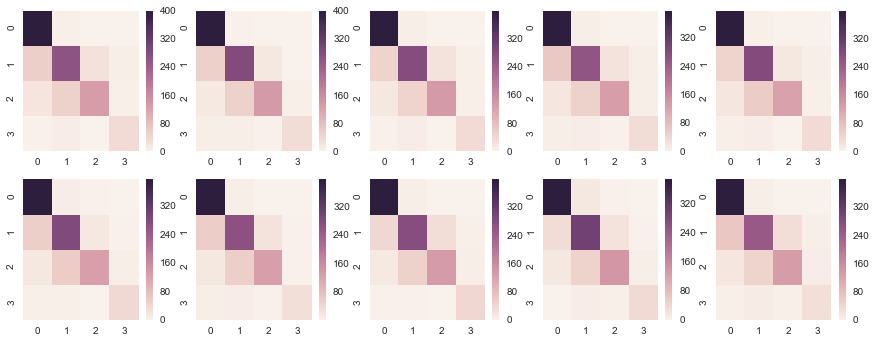

In [128]:
plt.figure(figsize=(15,15))
for i in range(len(confusion_matrices)):
    plt.subplot(5,5,i+1)
    sns.heatmap(confusion_matrices[i])
plt.show()

In [129]:
scores = []
confusion_matrices = []
def neural_model(Xtrain,Xtest,ytrain,ytest):
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest  =scaler.transform(Xtest)
    mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 10000)
    mlp.fit(Xtrain,ytrain);
    ypred = mlp.predict(Xtest)
    confusion_matrices.append(confusion_matrix(ytest,ypred))
    scores.append(mlp.score(Xtest, ytest))#storing different neaural network models owing to the random starting conditios

for i in range(10):
    neural_model(Xtrain,Xtest,ytrain,ytest)

print(np.mean(np.asarray(scores)))

0.832408325074


If you're getting a convergence warning, you could try having the model train over more iterations - change max_iter = 1000 or 10,000. Does this improve the average score?

>no the score was not improved

## Step 3: adding more inputs

Use X2 in place of X1 - does the score increase or decrease? Was this what you expected? How many samples are there in our training set?

In [54]:
X2 = []
y2 = []
for i in range(len(newer) - 1):
    line = newer[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        sensor1 =[int(x) for x in newer[i+1].strip().split('\t')]
        sensor5 = [int(x) for x in newer[i+5].strip().split('\t')]
        sensor10 = [int(x) for x in newer[i+10].strip().split('\t')]
            
        features =  sensor1+sensor5+sensor10
        X2.append(features)
        y2.append(classes[line]) # And record which class this set of features belongs to

In [58]:
np.shape(y2), np.shape(X2)

((269,), (269, 18))

In [59]:
X2train,X2test,y2train,y2test =ms.train_test_split(X2,y2)

In [61]:
scores2 = []
confusion_matrices2 = []
def neural_model(X2train,X2test,y2train,y2test):
    scaler = StandardScaler()
    scaler.fit(X2train)
    X2train = scaler.transform(X2train)
    X2test  =scaler.transform(X2test)
    mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 10000)
    mlp.fit(X2train,y2train);
    ypred = mlp.predict(X2test)
    confusion_matrices2.append(confusion_matrix(y2test,ypred))
    scores2.append(mlp.score(X2test, y2test))#storing different neaural network models owing to the random starting conditios

for i in range(10):
    neural_model(X2train,X2test,y2train,y2test)

In [73]:
print(np.mean(np.asarray(scores2)))

0.726470588235


>the score has decreased when using X2 instead of X1...this is expected because the number of elements used has significantly reduced. from about 4000 to about 260

## Step 4: feature engineering

Back to X1 as our input. Add an extra feature to each item in the array to represent the total force $f_t$. Assume:

$f_t^2 = f_1^2 + f_2^2 + f_3^2$

Your first input should now look like this:
X1[0] = [-1, -1, 61, -3, 0, 0, 61.0163912403872]

Repeat the steps from step 2. *Has this extra feature improved model performance?*

In [96]:
# Your answer
import math as mt
X11 = []
for i in X1.copy():
    f2 = 0
    for j in range(3):
        f2+= i[j]**2
    f2 = f2**0.5 
    ft = i
    ft.append(f2)
   
    X11.append(ft)

len(X11[0]), X11[0]

(7, [-1, -1, 63, -3, -1, 0, 63.0158710167526])

In [99]:
xtrain,xtest,ytrain, ytest = ms.train_test_split(X11,y);

In [100]:
scores = []
confusion_matrices = []
def neural_model(Xtrain,Xtest,ytrain,ytest):
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest  =scaler.transform(Xtest)
    mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 10000)
    mlp.fit(Xtrain,ytrain);
    ypred = mlp.predict(Xtest)
    confusion_matrices.append(confusion_matrix(ytest,ypred))
    scores.append(mlp.score(Xtest, ytest))

for i in range(10):
    neural_model(xtrain,xtest,ytrain, ytest)

In [101]:
print(np.mean(np.asarray(scores)))

0.845292368682


>the prediction score is slightly better cusing feature engineering than using X1

## Step 5: exploring

Create at least 3 more models, adding features or changing the number and size of the hidden layers. Print out the average score for your best model. Comment on what you've found.

In [ ]:
# Your answer

In [103]:
#first Model....increasing the number of hidden layers

scores = []
confusion_matrices = []
def neural_model(Xtrain,Xtest,ytrain,ytest):
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest  =scaler.transform(Xtest)
    mlp = MLPClassifier(hidden_layer_sizes=(20,20,20,20), max_iter = 10000)
    mlp.fit(Xtrain,ytrain);
    ypred = mlp.predict(Xtest)
    confusion_matrices.append(confusion_matrix(ytest,ypred))
    scores.append(mlp.score(Xtest, ytest))#storing different neaural network models owing to the random starting conditios

for i in range(10):
    neural_model(Xtrain,Xtest,ytrain,ytest)

print(np.mean(np.asarray(scores)))

0.388404360753


> adding another hidden layer reduced the accuracy of prediction

In [135]:
#second model....increasing the size of the hidden layers
scores = []
confusion_matrices = []
def neural_model(Xtrain,Xtest,ytrain,ytest):
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest  =scaler.transform(Xtest)
    mlp = MLPClassifier(hidden_layer_sizes=(90,90,90), max_iter = 10000)
    mlp.fit(Xtrain,ytrain);
    ypred = mlp.predict(Xtest)
    confusion_matrices.append(confusion_matrix(ytest,ypred))
    scores.append(mlp.score(Xtest, ytest))

for i in range(10):
    neural_model(Xtrain,Xtest,ytrain, ytest)
    
print(np.mean(np.asarray(scores)))

0.849256689792


>increasing the size of hidden layers significantly took more computation effort will no improvement in the performance of the first model

In [112]:
# Third model... adding ft and tt(equivalent torque)

#Saw i had to recreate X1 for code to work... not sure why
X1 = []
y = []
for i in range(len(newer) - 1):
    line = newer[i].strip() # .strip() removes the line endings \n
    if line in classes.keys(): # If the line matches one of our classes (for eg, 'normal')
        for k in range(1,16):
            features = [int(x) for x in newer[i+k].strip().split('\t')] # Split the next line to get our features
            X1.append(features)
            y.append(classes[line]) # And record which class this set of features belongs to

X11 = []
for i in X1.copy():
    f2 = 0
    for j in range(3):
        f2+= i[j]**2
    f2 = f2**0.5
        
    t2 = 0
    for j in range(3,6):
        t2+= i[j]**2
    t2 = t2**0.5 
    
    ft = i
    ft.append(f2)
    ft.append(t2)
   
    X11.append(ft)

len(X11[0]), X11[0]

(8, [-1, -1, 63, -3, -1, 0, 63.0158710167526, 3.1622776601683795])

In [113]:
xtrain,xtest,ytrain, ytest = ms.train_test_split(X11,y);

In [114]:
scores = []
confusion_matrices = []
def neural_model(Xtrain,Xtest,ytrain,ytest):
    scaler = StandardScaler()
    scaler.fit(Xtrain)
    Xtrain = scaler.transform(Xtrain)
    Xtest  =scaler.transform(Xtest)
    mlp = MLPClassifier(hidden_layer_sizes=(20,20,20), max_iter = 10000)
    mlp.fit(Xtrain,ytrain);
    ypred = mlp.predict(Xtest)
    confusion_matrices.append(confusion_matrix(ytest,ypred))
    scores.append(mlp.score(Xtest, ytest))

for i in range(10):
    neural_model(xtrain,xtest,ytrain, ytest)
    
print(np.mean(np.asarray(scores)))

0.840931615461


>adding the second engineered feature did not signiifcantly change the performance